In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#procedo a analizar el ultimo csv que tenemos aunque no sea el final para decidir que columnas son las mas importantes y clasificarlas.
file_path = "Streamlit/data/alquileres_completo_limpio.csv"
df = pd.read_csv(file_path)
df.head()

In [ ]:
#compruebo los valores vacios o nans que tenemos y los ordeno de mayor a menor ya que tenemos 58 columnas la mayoria vacias y la mayoria irrelevantes a la hora de  crear nuestro modelo
valores_vacios = (df.isnull().sum() / len(df)) * 100
df_porcentaje = pd.DataFrame({'Columna': valores_vacios.index, 'Porcentaje_NaNs': valores_vacios.values})
df_porcentaje = df_porcentaje.sort_values(by='Porcentaje_NaNs', ascending=False)
df_porcentaje

In [ ]:
#he seleccionado estas columnas,son las 29 primeras con mayor numero de nans, como podeis observar arriba
columnas_a_borrar = [
    "alcantarillado", "telefono", "calle_alumbrada", "calle_asfaltada", "interior", "tipo_de_casa", "chimenea",
    "urbanizado", "luz", "superficie_solar", "adaptado_a_personas_con_movilidad_reducida", "sistema_de_seguridad",
    "carpinteria_interior", "gas", "portero_automatico", "gastos_de_comunidad", "soleado", "vidrios_dobles",
    "trastero", "balcon", "lavadero", "carpinteria_exterior", "se_aceptan_mascotas", "puerta_blindada",
    "agua", "garaje", "comedor", "piscina", "tipo_suelo", "exterior"]
#cuando nos juntemos todos podemos comprobar mas o pruebo con las restantes un corr.

In [ ]:
df = df.drop(columns=[col for col in columnas_a_borrar if col in df.columns], errors='ignore')
df.shape

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
csv_file_path = "pruebaE.csv"
df.to_csv(csv_file_path, index=False)

In [ ]:
df.dtypes


In [ ]:
df_numerico = df.select_dtypes(include=['number'])
correlation_matrix = df_numerico.corr()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()

In [ ]:
#ha simple vista podemos observar que las columnas numericas con mayor relacion al precio  son las superficies que pueden ser redundantes al proporcionar el mismo tipo de informacion
#y por el contrario las que menos serian planta, codigo postal, precio por metro cuadrado que en principio deberia ser relevante y habitaciones


In [ ]:
#otra vista mas visual, de las columnas numericas
correlaciones_precio = df_numerico.corr()['precio'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=correlaciones_precio.index, y=correlaciones_precio.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlación de las Variables con el Precio")
plt.xlabel("Variables")
plt.ylabel("Coeficiente de Correlación")
plt.show()



In [ ]:
# Mostrar la tabla de correlaciones en formato visual
#tools.display_dataframe_to_user(name="Correlaciones con Precio", dataframe=correlaciones_precio.to_frame())
#correlaciones_precio_df = correlaciones_precio.to_frame().reset_index()
#correlaciones_precio_df.columns = ["Variable", "Correlación con Precio"]
#print(correlaciones_precio_df.to_string(index=False))  # Para imprimir en formato claro

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
valores_vacios = (df.isnull().sum() / len(df2)) * 100
df_porcentaje2 = pd.DataFrame({'Columna': valores_vacios.index, 'Porcentaje_NaNs': valores_vacios.values})
df_porcentaje2 = df_porcentaje2.sort_values(by='Porcentaje_NaNs', ascending=False)
df_porcentaje2

In [ ]:
#voy a seguir quitando columnas que ha simple vista tienen muchos nan o me parecen irrelevantes

In [ ]:
df_prueba = df[["precio", "piscina"]].dropna(subset="precio")
df_prueba["piscina"] = ~df_prueba["piscina"].isna()
df_prueba

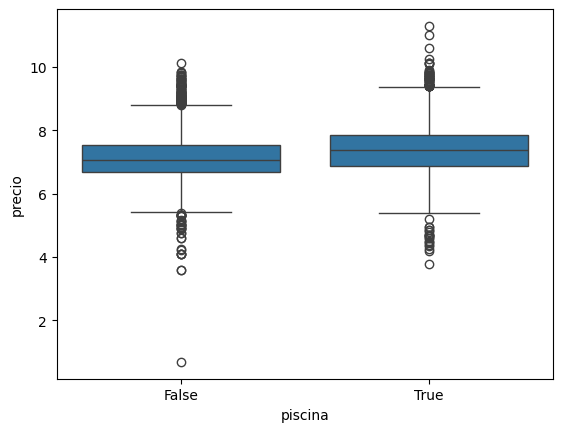

1600.0
1150.0


In [ ]:

sns.boxplot(x = df_prueba["piscina"],y=df_prueba["precio"].apply(np.log1p))
plt.show()

print(df_prueba[df_prueba["piscina"]]["precio"].median())
print(df_prueba[~df_prueba["piscina"]]["precio"].median())


In [ ]:
precio = df["precio"].quantile(0.95)
fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["piscina"], kde = True, ax = axes[0]); sns.boxplot(x = precio, y = df["piscina"], ax = axes[1]); plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["baños"]);
plt.show()

In [ ]:
sns.boxplot(x = precio, y = df["baños"])

In [ ]:
df_filtrado = df[df["baños"] < df["baños"].quantile(0.99)]
sns.histplot(x=df_filtrado["baños"], kde=True)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["superficie"], kde = True, ax = axes[0]);
sns.boxplot(x = precio, y = df["superficie"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["superficie"]);
plt.show()

In [ ]:
df